## <center> 🧠 AI-Powered Resume Screening System
### <center> ***Author: Prathamesh Patravale***

#### <center>**1. Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

### <center> 2. Load Data

In [5]:
# Folder containing resumes
resume_dir = "data/resumes"
jd_path = "data/job_description.txt"

# Load Job Description
with open(jd_path, "r", encoding="utf-8") as f:
    job_description = f.read()

# Load resumes
resumes = []
names = []
for file in os.listdir(resume_dir):
    if file.endswith(".txt"):
        with open(os.path.join(resume_dir, file), "r", encoding="utf-8") as f:
            resumes.append(f.read())
            names.append(file)

df = pd.DataFrame({"Resume": resumes, "Name": names})

### <center> 3. Compute Similarity Scores


In [6]:
texts = [job_description] + resumes
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(texts)
jd_vec = tfidf[0]
resume_vecs = tfidf[1:]

similarities = cosine_similarity(jd_vec, resume_vecs).flatten()
df["Similarity"] = similarities

### <center> 4. Evaluate with manual labels (optional)


In [7]:
# Create labels manually (1=good match, 0=poor match)
labels = [1, 1, 0, 0, 1, 0][:len(df)]  # sample
df["Actual"] = labels
df["Predicted"] = (df["Similarity"] >= 0.5).astype(int)

acc = accuracy_score(df["Actual"], df["Predicted"])
prec = precision_score(df["Actual"], df["Predicted"])
rec = recall_score(df["Actual"], df["Predicted"])
f1 = f1_score(df["Actual"], df["Predicted"])
auc = roc_auc_score(df["Actual"], df["Similarity"])

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1: {f1:.2f}")
print(f"ROC-AUC: {auc:.2f}")


Accuracy: 0.50
Precision: 0.00
Recall: 0.00
F1: 0.00
ROC-AUC: 0.50


d:\PW DATA SCIENCE\5 Projects\Project_2\project\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### <center> 5. Visualization


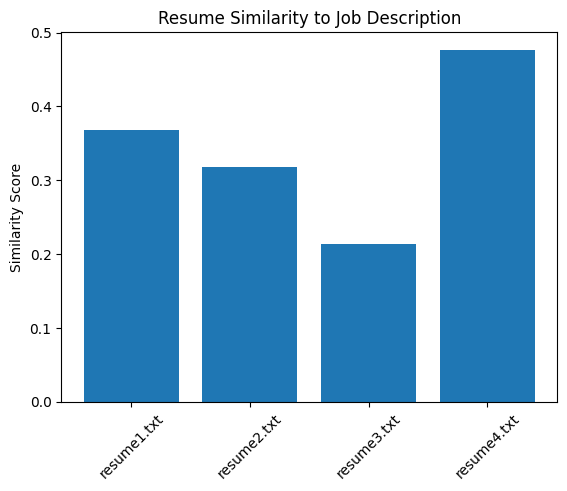

✅ Saved results.csv for evaluation.


In [8]:
plt.bar(df["Name"], df["Similarity"])
plt.xticks(rotation=45)
plt.ylabel("Similarity Score")
plt.title("Resume Similarity to Job Description")
plt.show()

# Save results
df.to_csv("results.csv", index=False)
print("✅ Saved results.csv for evaluation.")